
# MTH3302 : Méthodes probabilistes et statistiques pour l'I.A.

## Projet de fin de session

#### Équipe 5

_Julien Bergeron, Yoan Gauthier, Xhulio Hasani, Yvan Luu et Kaixiang Mu_

_Le lundi 22 avril 2019_
___
### Table des matières:
+ [1. Introduction](#1.)
    + [1.1. Methodologie de travail](#1.1.)  
    + [1.2. Fonctions utiles](#1.2.)  
<br>
<br>
+ [2. Analyse préliminaire des données](#2.)  
    + [2.1. Description des variables d'intérêt et explicatives](#2.1.) 
    + [2.2. Chargement des données de l'ensemble d'entraînement](#2.2.)
    + [2.3.-Nettoyage des données](#2.3.) 
<br>
<br> 
+ [3. Analyse exploratoire](#3.) 
    + [3.1. Fréquence des modes de transport](#3.1.) 
    + [3.2. Fréquence des modes de transport en fonction de la distance du ménage au centre-ville](#3.2.) 
    + [3.3. Fréquence des modes de transport en fonction de l'âge des individus](#3.3.) 
    + [3.4. Fréquence des modes de transport en fonction de la distance au métro le plus proche](#3.4.) 
    + [3.5. Fréquence des modes de transport en fonction de la distance du train](#3.5.) 
    + [3.6. Fréquence des modes de transport en fonction du nombre d'emplois disponibles à moins de 45 min de transport en commun](#3.6.) 
    + [3.7. Fréquence des modes de transport en fonction du nombre d'autos du ménage](#3.7.) 
    + [3.8. Fréquence des modes de transport en fonction du nombre de personnes dans le ménage](#3.8.) 
    + [3.9. Fréquence des modes de transport en fonction du code d'arrondissement](#3.9.) 
    + [3.10. Fréquence des modes de transport en fonction du revenu du ménage](#3.10.) 
    + [3.11. Fréquence des modes de transport en fonction du sexe](#3.11.) 
    + [3.12. Fréquence des modes de transport en fonction du groupe d'âge](#3.12.) 
    + [3.13. Fréquence des modes de transport en fonction de l'occupation principale](#3.13.) 
    + [3.14. Fréquence des modes de transport en fonction du statut de permis de conduire](#3.14.) 
    + [3.15. Fréquence des modes de transport en fonction du motif de déplacement](#3.15.) 
    + [3.16. Fréquence des modes de transport en fonction du rang de la personne dans le ménage](#3.16.) 
    + [3.17. Fréquence des modes de transport en fonction de l'heure du départ de la personne](#3.17.) 
<br>
<br>
+ [4. Sélection du modèle de prédiction](#4.)
    + [4.1. Régression linéaire](#4.1.)
    + [4.2. Régression logistique](#4.2.)
    + [4.3. Régression linéaire bayésienne](#4.3.)  
    + [4.4. Classification bayésienne naïve](#4.4.)  
    + [4.5. L'entropie comme mesure de la qualité du modèle](#4.5.)
<br>
<br>
+ [5. Classification bayésienne naïve](#5.)
    + [5.1. Modification du jeu de données](#5.1.)  
    + [5.2. Association de distribution par variable explicative selon le mode](#5.2.) 
        + [5.2.1. :M_PERS](#5.2.1.) 
        + [5.2.2. :M_AUTO](#5.2.2.) 
        + [5.2.3. :M_DOMSM](#5.2.3.) 
        + [5.2.4. :M_revenu](#5.2.4.) 
        + [5.2.5. :M_dist_train](#5.2.5.) 
        + [5.2.6. :M_dist_metro](#5.2.6.) 
        + [5.2.7. :M_dist_centre](#5.2.7.) 
        + [5.2.8. :M_emploiTC](#5.2.8.) 
        + [5.2.9. :P_RANG](#5.2.9.) 
        + [5.2.10. :P_SEXE](#5.2.10.) 
        + [5.2.11. :P_AGE](#5.2.11.) 
        + [5.2.12. :P_GRAGE](#5.2.12.) 
        + [5.2.13. :P_STATUT](#5.2.13.) 
        + [5.2.14. :P_PERMIS](#5.2.14.) 
        + [5.2.15. :P_HREDE](#5.2.15.) 
        + [5.2.16. :D_MOTIF](#5.2.16.) 
    + [5.3. Importation du jeu de données à tester](#5.3.)  
    + [5.4. Distributions des variables explicatives dans leurs conteneurs respectifs](#5.4.) 
    + [5.5. Choix des variables explicatives](#5.5.)
    + [5.6. Calcul de la probabilité marginale pour chaque moyen de transport](#5.6.)  
    + [5.7. Prédiction des transports](#5.7.) 
<br>
<br>     
+ [6. Résultats et analyse](#6.)  
    + [6.1. Difficultées rencontrée](#6.1.)
    + [6.2. Autres approches essayées](#6.2.)
<br>
<br> 
+ [7. Conclusion](#7.)  
    + [7.1. Retour sur le travail en équipe](#7.1.)
    + [7.2. Retour sur la méthodologie](#7.2.)
    + [7.3. Retour sur les résultats](#7.3.)
___


<a id='1.'></a>
## 1. Introduction
_____
Nous avons en notre disposition les données recueillies par un sondage sur les habitudes de transport de quelque 80 000 québécois. L'objectif du projet final du cours MTH3302 est de mettre en place un modèle d'apprentissage machine capable de prédire le mode de transport utilisé pour un déplacement donné. Ces derniers sont caractérisés par 19 variables explicatives (illustrées ci-dessous) qui sont en lien avec les informations sur le déplacement, la personne effectuant ce déplacement et son ménage.

Le présent rapport va tout d'abord présenter notre méthodologie générale que nous avons empruntée pour arriver à notre résultat final. Nous poursuivrons en faisant une première analyse préliminaire des données, cette analyse va simplement représenter les histogrammes des données et est utile pour avoir une idée générale des variables. Une seconde analyse plus en profondeur sera par la suite présentée où nous nous attarderons à essayer de trouver des relations plus profondes entre les données. Nous proposerons aussi des lois connues de probabilité qui peuvent être utilisées pour modéliser chacune des variables. À la [section 4](#4.), nous présenterons les différentes techniques que nous avons pensé utiliser pour résoudre le problème, nous nous attarderons plus longuement à la classification bayésienne naïve à la [section 5](#5.). Lors de cette section, nous montrerons notre solution au problème, l'algorithme et les fonctions utilisés pour extraire l'information et le résultat du jeu de donnée. À la [section 6](#6.), nous présenterons une analyse critique des résultats obtenus. Nous discuterons les difficultés rencontrées et les approches différentes qui auraient pu être empruntées pour arriver à un meilleur résultat.
_____


<a id='1.1.'></a>
### 1.1. Methodologie de travail
<br>
<div style="text-align:justify">
La première étape lors de la prise en main du travail a été de faire une analyse exhaustive des variables de notre base de données. Nous avons étudié chacune des variables séparément pour essayer d'avoir une idée de leur relation avec notre variable d'intérêt. 
<div style="text-align:justify">
Pour chacune des variables, nous avons tracé un histogramme des modes de transport empruntés par rapport à cette variable. Lorsque possible, nous avons par la suite tenté de modéliser chacun des diagrammes par un graphe de distribution selon différentes lois de probabilités connues. Ceci nous a permis d'avoir une meilleure idée des relations entre les variables et aussi d'avoir une idée grossière de la qualité des variables en tant que variable explicative.
<div style="text-align:justify">
Tout au long du cours, nous avons étudié plusieurs méthodes qui auraient pu être tentées pour résoudre le problème qui nous est donné. Nous nous sommes assez rapidement concentrés sur la classification bayésienne naïve, car il s'agit de la méthode qui nous a semblé la plus puissante et la plus adéquate pour le problème en main. 
</div>


_____
Nous commençons par importer les librairies dont nous utiliserons au cours de ce travail:

In [ ]:
using CSV, DataFrames, Gadfly, Distributions, StatsBase;

Nous utilisons des fichiers différents entre une soumission (test_mode = false) et des tests en local (test_mode = true). Les fichiers trainData.csv et testData.csv ont été générés à l'aide de ODtrain.csv de manière aléatoire avec une répartition de 25% pour les testData et 75% pour le trainData.

In [ ]:
test_mode = false
if(test_mode)
    include("SplitData.jl")
    global train_data = "trainData.csv"
    global test_data = "testData.csv"
else
    global train_data = "ODtrain.csv"
    global test_data = "ODtest.csv"
end

<a id='1.2.'></a>
### 1.2. Fonctions utiles
Toutes nos fonctions se trouvent dans le fichier utilities.jl afin de ne pas polluer l'ensemble du rapport.
#### function modify_data!(df)
Fonction permettant de modifier le jeu de données basé sur les explications fait au cours de l'analyse. Comme exemple de transformations possibles il y a des conversions de Float64 en Int64, la transformation d'une colonne en forme traitable pour une Bernoulli ou une Categorielle ou la combinaison de deux colonnes.
#### function histnorm(train::DataFrame, edges::AbstractVector, varname::Symbol)
Fonction fournie au début du projet permettant d'extraire la fréquence relative de chaque mode en fonction des 
classes «edges» de la variable explicative.
#### function variance_for_categorization(col)
Fonction permettant de trouver les points de variances maximaux dans une colonne afin d'aider à faire la transformation vers une Bernoulli.
#### function get_score(submission, real)
Fonction permettant d'avoir le score des prédictions lorsque le Jupyter est en mode de tests locaux.
#### function get_values_based_on_mode(mode, col)
Fonction permettant d'extraire les données d'une colonne par mode.
#### function find_best_distribution(distributions, variable, data)
Fonction permettant de voir sur quelle distribution le jeu de données offre la plus grande entropie. Utile pour trouver les modèles pour la prédiction.
#### function print_entropy(distribution, variable, data)
Permets de montrer l'entropie d'une variable donnée dans le jeu de données selon une distribution choisie.
#### function show_fit(df, mode, varname, dist)
Permets de retourner un graphique contenant la courbe de distribution et l'histogramme de la distribution des données.

In [ ]:
include("utilities.jl")

<a id='2.'></a>
## 2. Analyse préliminaire des données

<a id="2.1."></a> 
### 2.1. Description des variables d'intérêt et explicatives

Notre variable d'intérêt est le mode de déplacement:

- **D_Mode** : mode(s) emprunté pour se déplacer (1: Automobile, 2: Transport collectif, 3: Auto & TC, 4: Actif (vélo & marche), 5: Autre).<br/>

Ci-dessous sont les 18 variables qui vont être utilisées pour prédire la variable d'intérêt: 

- **IPERE**: numéro unique du déplacement. Elle est constituée de 6 chiffres également et unique pour chaque déplacement.<br/>
- **Ménage** : numéro du ménage. Elle est constituée de 6 chiffres et unique pour chaque ménage.<br/>
- **M_AUTO** : nombre de véhicules du ménage : 0 à 14.<br/>
- **M_PERS** : nombre de personnes du ménage : 1 à 19.<br/>
- **M_DOMSM** : secteur municipal du ménage (113 secteurs municipaux).<br/>
- **M_revenu** : catégories des revenus en dollars des gens interrogés (1 : Moins de 30 000, 2 : 30 000 à 59 999, 3 : 60 000 à 89 999, 4 : 90 000 à 119 999, 5 : 120 000 à 149 999, 6 : 150 000 et plus, 7 : Refus, 8 : Ne sait pas)<br/>
- **M_dist_train** : distance réseau de la station de train la plus proche à partir du domicile.<br/>
- **M_dist_metro** : distance réseau de la station de métro la plus proche à partir du domicile.<br/>
- **M_emploiTC** : accessibilité à l’emploi en transport en commun (représente le nombre d’emplois qui sont accessibles en transport en commun en moins de 45 minutes à 8 heures le matin).<br/>
- **M_dist_centre** : distance réseau jusqu'au centre-ville (Gare Centrale) à partir du domicile.<br/>
- **P_RANG** : numéro de la personne du ménage : 1 à 19.<br/>
- **P_SEXE** : sexe de la personne : 1=masculin 2=féminin.<br/>
- **P_AGE** : âge de la personne : 1 à 99.<br/>
- **P_GRAGE** : groupe d'âge de la personne. Elle contient 11 catégories (1 : 0 à 4 ans, 2 : 5 à 9 ans, 3 : 10 à 14 ans, 4 : 15 à 19 ans, 5 : 20 à 24 ans, 6 : 25 à 34 ans, 7 : 35 à 44 ans, 8 : 45 à 54 ans, 9 : 55 à 64 ans, 10 : 65 à 74 ans, 11 : 75 et plus)<br/>
- **P_STATUT** : occupation principale de la personne. Elle contient 8 catégories (1:Travail à temps plein, 2: Travail à temps partiel, 3: Étudiant, 4: Retraité, 5: Autre, 6: Enfant de 4 ans et moins, 7 À la maison, 8: Refus).<br/>
- **P_PERMIS** : possession d’un permis de conduire. Elle contient 5 catégories (1: Oui, 2: Non, 3: Ne sait pas, 4: Refus, 5: Non applicable(<16 ans)).<br/>
- **D_HREDE** : heure du départ (heuresminutes = 0 à 2800).<br/>
- **D_MOTIF** : motif du déplacement. Elle contient 13 catégories (1: Travail, 2: Rendez-vous d'affaires, 3: Sur la route, 4: École, 5: Magasinage, 6: Loisir, 7: Visite d'ami(e)s/parenté, 8: Santé, 9: Reconduire quelqu'un, 10: Chercher quelqu'un, 11: Retour au domicile, 12: Autre, 13: Indéterminé/refus/NSP).<br/>


<a id="2.2."></a>
### 2.2. Chargement des données de l'ensemble d'entraînement

Le fichier *ODtrain.csv* a été téléchargé sur le site Moodle du cours. Le fichier est en format CSV et son inclusion dans le calepin se fait comme suit.

In [ ]:
train = CSV.read(train_data)
first(train,5)

In [ ]:
n = size(train,1)
p = size(train,2)
println("Le fichier d'entraînement contient $n déplacements et $p variables.")

<a id="2.3."></a> 
### 2.3. Nettoyage des données

Dans ce jeu de données, il n'y a aucune valeur manquante. La première étape consiste à se débarrasser du type complexe des variables permettant d'avoir des valeurs manquantes. La deuxième étape consiste à transformer le mode de transport en une variable catégorielle avec un beau nom pour faire des plus beaux graphique.

In [ ]:
dropmissing!(train, disallowmissing=true);

On renomme les catégories de transport pour que les graphiques soient plus lisibles.

In [ ]:
str_mode = ["Voiture", "Transport Collectif", "Hybride", "Actif", "Autre"]

d = Array{String}(undef,n)

for i=1:length(str_mode)
    ind = train[:D_Mode] .== i
    d[ind] .= str_mode[i]  
end

train[:D_Mode_str] = d
categorical!(train, :D_Mode_str);

<a id="3."></a>
## 3. Analyse exploratoire
___

L'analyse exploratoire de données est une étape essentielle, car c'est un processus d'inspection, de nettoyage, de transformation et de modélisation de données visant à

- découvrir des informations utiles ;
- alimenter des conclusions ;
- appuyer la prise de décision. 

Ci-dessous, nous allons documenter les étapes de notre analyse exploratoire. Pour chacune des variables, des graphiques sont produits afin de montrer la relation entre la variable étudiée et notre variable d'intérêt. Il nous sera aussi possible de faire des 'fits' avec des lois de probabilités connues.

<a id="3.1."></a>
### 3.1. Fréquence des modes de transport

Affiche le nombre de déplacements dans l'ensemble d'entraînement pour chacun des modes. 

In [ ]:
set_default_plot_size(9inch, 6inch)
plot(train, x=:D_Mode_str, Geom.histogram)

On remarque que la voiture est le mode de transport le plus populaire.

<a id="3.2."></a> 
### 3.2. Fréquence des modes de transport en fonction de la distance du ménage au centre-ville

Affiche le nombre de déplacements par modes en fonction de la distance du domicile à la gare Centrale de Montréal.

In [ ]:
plot(train, x=:M_dist_centre, color=:D_Mode_str,
     Geom.histogram(bincount=30), Coord.cartesian(xmin=0, xmax = 65))

On remarque que quand la distance du domicile à la gare Centrale de Montréal est petite, les gens ont tendance à utiliser un mode de transport actif ou les transports collectifs. Plus le domicile est loin de la gare Centrale, plus l'usage de l'automobile devient important.

On remarque aussi que la plupart des gens questionnés avaient un domicile proche de la gare Centrale de Montréal. Ceci peut refléter la réalité où la densité de la population est plus importante au centre-ville que dans les banlieues.

In [ ]:
df = histnorm(train,0:1:40,:M_dist_centre)
plot(df, x = :M_dist_centre, y=:proportion, color=:D_Mode_str, Geom.bar, Coord.cartesian(ymin=0, ymax=1))

<a id="3.3."></a>
### 3.3. Fréquence des modes de transport en fonction de l'âge des individus

Affiche le nombre de déplacements par modes en fonction de l'âge des individus.

In [ ]:
plot(train, x=:P_AGE, color=:D_Mode_str, Geom.histogram(bincount=8))

On remarque que les gens de moins de 25 ans ont plus tendance à prendre d'autres modes de transport que la voiture et que l'utilisation de la voiture croît avec l'âge. Le transport actif est également plus important lors d'un plus jeune âge.

In [ ]:
df = histnorm(train,0:10:80,:P_AGE)
plot(df, x = :P_AGE, y=:proportion, color=:D_Mode_str, Geom.bar, Coord.cartesian(ymin=0, ymax=1))

<div style="text-align:justify">
On peut constater que l'âge peut avoir un impact considérable sur le monde de transport emprunté par un individu. 
On remarque qu'en très bas âge, la voiture est le principal mode, mais que le transport actif et autre sont tout de même assez présents.
Les enfants et les adolescents tendent à voyager plus avec "autre" (on suppose qu'il s'agit du transport scolaire), le transport actif, un peu de transport collectif et un peu de voitures.
Les jeunes adultes (≈ 20 ans) voyagent beaucoup en transport collectif et en voiture, très peu utilisent les autres types de transports.
Plus l'âge augmente, plus la proportion de la voiture augmente aux dépens du transport collectif, et ce, jusqu'à, environ, l'âge de 40. Par la suite, les proportions sont relativement constantes. 
À partir de 60 ans, il y a trop peu de données et on remarque du bruit dans les données. On peut par contre déduire que la voiture est quasi l'unique mode de transport.
</div>

<a id="3.4."></a>
### 3.4. Fréquence des modes de transport en fonction de la distance au métro le plus proche

La distance est en kilomètre.

In [ ]:
plot(train, x=:M_dist_metro, color=:D_Mode_str,
     Geom.histogram(bincount=20), Coord.cartesian(xmin=0, xmax = 65))

L'utilisation des transports collectifs et des modes actifs sont prépondérants lorsque la distance entre le domicile et la station de métro la plus proche est à moins de ~2 km. L'automobile est plus prisée au fur et à mesure que la distance augmente. 
    

In [ ]:
df = histnorm(train,0:2:40,:M_dist_metro)
plot(df, x = :M_dist_metro, y=:proportion, color=:D_Mode_str, Geom.bar, Coord.cartesian(ymin=0, ymax=1))

<div style="text-align:justify">
Dans les deux graphiques précédents, on remarque que les gens habitants très près d'une station de métro sont beaucoup plus nombreux à utiliser le transport en commun. Plus on s'éloigne du métro, moins l'écart est marqué entre les modes selon la distance. Deux options sont donc possibles: utiliser une distribution continue pour modéliser les données ou bien séparer en deux groupes, ceux qui sont proches du métro et ceux qui ne le sont pas et utiliser une distribution discrète.

Commençons par trouver la distribution continue qui représente le mieux cette variable. Il semble y avoir un fort impact sur le transport collectif et actif lorsqu'un ménage est près d'une station. Une distribution Gamma pourrait être appropriée.
</div>

<a id="3.5."></a>
### 3.5. Fréquence des modes de transport en fonction de la distance du train

In [ ]:
plot(train, x=:M_dist_train, color=:D_Mode_str, Geom.histogram(bincount=50))

In [ ]:
df = histnorm(train,0:2:60,:M_dist_train)
plot(df, x = :M_dist_train, y=:proportion, color=:D_Mode_str, Geom.bar, Coord.cartesian(ymin=0, ymax=1, xmin=0, xmax=56))

Comme pour la variable précédente (M_dist_metro), il semble y avoir une relation entre l'utilisation du transport collectif et la proximité du ménage avec une station. Une distribution continue pourrait permettre de bien modéliser cette variable.


<a id="3.6."></a>
### 3.6. Fréquence des modes de transport en fonction du nombre d'emplois disponibles à moins de 45 min de transport en commun

Trajet calculé à 8h00 du matin.

In [ ]:
plot(train, x=:M_emploiTC, color=:D_Mode_str, Geom.histogram(bincount=30))

In [ ]:
df = histnorm(train,0:1e5:1e6,:M_emploiTC)
plot(df, x = :M_emploiTC, y=:proportion, color=:D_Mode_str, Geom.bar, Coord.cartesian(ymin=0, ymax=1))

On remarque une diminution de l'utilisation de la voiture et une augmentation de l'utilisation du transport collectif et le mode actif lorsque le nombre d'emplois augmente. Cependant, cela pourrait simplement être une indication que la personne vit au centre-ville où le transport collectif est accessible.

<a id="3.7."></a>
### 3.7. Fréquence des modes de transport en fonction du nombre d'autos du ménage

In [ ]:
plot(train, x=:M_AUTO, color=:D_Mode_str, Geom.histogram(bincount=14))

In [ ]:
df = histnorm(train,0:1:19,:M_AUTO)
plot(df, x = :M_AUTO, y=:proportion, color=:D_Mode_str, Geom.bar, Coord.cartesian(ymin=0, ymax=1))

On peut observer que avec 0 voiture dans le ménage, le transport collectif et actif sont prédominante, mais ces modes diminuent de façon dramatique avec plus d'une voiture dans le domicile

<a id="3.8."></a>
### 3.8. Fréquence des modes de transport en fonction du nombre de personnes dans le ménage

In [ ]:
plot(train, x=:M_PERS, color=:D_Mode_str, Geom.histogram(bincount=19))

In [ ]:
df = histnorm(train,0:1:19,:M_PERS)
plot(df, x = :M_PERS, y=:proportion, color=:D_Mode_str, Geom.bar, Coord.cartesian(ymin=0, ymax=1))

On observe que les modes _Actif_ et _Autre_ augmentent avec le nombre de personnes dans le ménage

<a id="3.9."></a>
### 3.9. Fréquence des modes de transport en fonction du code d'arrondissement

In [ ]:
plot(train, x=:M_DOMSM, color=:D_Mode_str, Geom.histogram(bincount=113))

In [ ]:
df = histnorm(train,101:1:132,:M_DOMSM)
plot(df, x = :M_DOMSM, y=:proportion, color=:D_Mode_str, Geom.bar, Coord.cartesian(ymin=0, ymax=1))

Le secteur municipal ne semble pas avoir un effet significatif sur le mode de transport. Il pourrait être intéressant de comparer le secteur avec les revenus des personnes dans ces secteurs pour les catégoriser.

<a id="3.10."></a>
### 3.10. Fréquence des modes de transport en fonction du revenu du ménage

In [ ]:
plot(train, x=:M_revenu, color=:D_Mode_str, Geom.histogram(bincount=8))

In [ ]:
df = histnorm(train,1:1:8,:M_revenu)
plot(df, x = :M_revenu, y=:proportion, color=:D_Mode_str, Geom.bar, Coord.cartesian(ymin=0, ymax=1), Coord.cartesian(xmin=1, xmax=8))

<div style="text-align:justify">
On remarque pour la variable du revenu que pour les groupes entre 2 et 8, la répartition des modes transfert est plutôt similaire. Par contre, on remarque une proportion de gens qui utilisent leur voiture plus faible pour la catégorie 1. Il serait donc ici intéressant de séparer le revenu en deux catégories: la première pour les revenus de la catégorie 2 et la deuxième pour le reste. Comme on utilise deux catégories, utiliser une distribution de Bernouilli est approprié. 
</div>

<div style="text-align:justify">
    Cependant, avec un modèle de Bayes naïf en utilisant seulement la variable explicative M_revenu, on obtient une précision de 0.54508. Cette précision est obtenue lorsqu'on ne modifie pas les classes de M_revenu et qu'on utilise une distribution Gamma. En séparant nos données en deux classes et en utilisant une distribution de Bernouilli, on obtient une précision de 0.54465. Cette précision plus faible invalide notre hypothèse de séparer cette variable en deux classes.
</div>

<a id="3.11."></a>
### 3.11. Fréquence des modes de transport en fonction du sexe

In [ ]:
df = histnorm(train,1:1:3,:P_SEXE)
plot(df, x = :P_SEXE, y=:proportion, color=:D_Mode_str, Geom.bar, Coord.cartesian(ymin=0, ymax=1, xmin=1, xmax=3))

On peut voir que les hommes sont légèrement plus susceptibles de prendre la voiture que les femmes et légèrement moins enclins au transport en public. Pour ce qui est des autres types de transports, les proportions sont plutôt similaires.

En somme, ce n'est pas une variable explicative très forte. Par contre, elle pourrait être utilisée, avec une loi de Bernouilli, afin de bonifier la probabilité qu'une personne utilise la voiture si c'est un homme.

<a id="3.12."></a>
### 3.12. Fréquence des modes de transport en fonction du groupe d'âge

In [ ]:
plot(train, x=:P_GRAGE, color=:D_Mode_str, Geom.histogram(bincount=20), Coord.cartesian(xmin=1, xmax=20))

In [ ]:
df = histnorm(train,1:1:12,:P_GRAGE)
plot(df, x = :P_GRAGE, y=:proportion, color=:D_Mode_str, Geom.bar, Coord.cartesian(ymin=0, ymax=1, xmin=2, xmax=12))

Cette variable nous donne la même information que P_AGE mais avec une granularité plus grossière. Les courbes de proportion ont toutefois la même forme. 

<a id="3.13."></a>
### 3.13. Fréquence des modes de transport en fonction de l'occupation principale

In [ ]:
plot(train, x=:P_STATUT, color=:D_Mode_str, Geom.histogram(bincount=8), Coord.cartesian(xmin=1, xmax=8))

On remarque que la grande majorité des personnes ayant répondu au sondage sont des personnes qui travaillent à temps plein (statut: 1) ou à temps partiel (statut: 2).

In [ ]:
df = histnorm(train,1:1:9,:P_STATUT)
plot(df, x = :P_STATUT, y=:proportion, color=:D_Mode_str, Geom.bar, Coord.cartesian(ymin=0, ymax=1, xmin=1, xmax=9))

<a id="3.14."></a>
### 3.14. Fréquence des modes de transport en fonction du statut de permis de conduire

In [ ]:
plot(train, x=:P_PERMIS, color=:D_Mode_str, Geom.histogram(bincount=8), Coord.cartesian(xmin=1, xmax=5))

In [ ]:
df = histnorm(train,1:1:6,:P_PERMIS)
plot(df, x = :P_PERMIS, y=:proportion, color=:D_Mode_str, Geom.bar, Coord.cartesian(ymin=0, ymax=1, xmin=1, xmax=6))

On remarque que les personnes ayant un permis ont une grande utilisation de la voiture. On pourrait catégoriser cette variable en deux classes: la personne possède un permis et les autres. Ou tout simplement laisser les catégories.

<a id="3.15."></a>
### 3.15. Fréquence des modes de transport en fonction du motif de déplacement

In [ ]:
plot(train, x=:D_MOTIF, color=:D_Mode_str, Geom.histogram(bincount=16), Coord.cartesian(xmin=1, xmax=5))

In [ ]:
df = histnorm(train,1:1:6,:D_MOTIF)
plot(df, x = :D_MOTIF, y=:proportion, color=:D_Mode_str, Geom.bar, Coord.cartesian(ymin=0, ymax=1, xmin=1, xmax=6))

Cette variable ne semble pas apportée beaucoup d'informations au problème. La description de la variable nous laisse croire qu'il devrait y avoir 13 catégories, mais, comme on peut voir ci-dessus, seulement deux de celles-ci sont représentées dans le jeu de données.

<a id="3.16."></a>
### 3.16. Fréquence des modes de transport en fonction du rang de la personne dans le ménage

In [ ]:
plot(train, x=:P_RANG, color=:D_Mode_str, Geom.histogram(bincount=19), Coord.cartesian(xmin=1, xmax=19))

In [ ]:
df = histnorm(train,1:1:6,:P_RANG)
plot(df, x = :P_RANG, y=:proportion, color=:D_Mode_str, Geom.bar, Coord.cartesian(ymin=0, ymax=1, xmin=1, xmax=19))

<div style="text-align=justify">
Le rang dans la famille semble avoir une légère conséquence  sur le mode de transport emprunté. Plus le rang est élevé, plus l'individu est susceptible de prendre le transport en commun et moins il est susceptible de prendre la voiture. Par contre, il est raisonnable de supposer que cette corrélation est seulement un effet du fait que les rangs plus élevés sont les individus les plus jeunes d'une famille que les tendances remarquées sont en fait dues à l'âge. On déduit donc que cette variable n'est probablement pas très utile, car elle est probablement colinéaire avec la variable de l'âge.
</div>

<a id="3.17."></a>
### 3.17. Fréquence des modes de transport en fonction de l'heure du départ de la personne

In [ ]:
plot(train, x=:D_HREDE, color=:D_Mode_str, Geom.histogram(bincount=20), Coord.cartesian(xmin=1, xmax=2800))

<div style="text-align:justify">
Nous pouvons voir que les proportions changent légèrement selon l'heure du déplacement. Somme toute, ce qui est le plus intéressant est de remarquer que les déplacements qui se font très tôt le matin se font exclusivement en voiture. Sinon, pour ce qui est des déplacements qui se font durant la journée, les proportions restent relativement semblables.
</div>

<a id="4."></a> 
## 4. Sélection du modèle de prédiction

Voici différents modèles de prédiction statistique que nous avions vue en cours. Nous survoler ces modèles afin de déterminer s'ils pourraient être utiles dans le contexte de ce travail.

<a id="4.1."></a>
### 4.1. Régression linéaire

<div style="text-align:justify">
La régression linéaire est un outil puissant pour faire des prédictions sur une variable d'intérêt. Cependant, étant donné que notre mode de transport est une variable classifiée, il y a de meilleures méthodes à considérer telle que la régression logistique ou une méthode de classification.
</div>

<a id="4.2."></a>
### 4.2. Régression logistique
<br/>
<div style="text-align:justify">
La régression logistique est une bonne méthode pour la classification. Le problème avec ce modèle survient lorsqu'on cherche à classifier notre variable d'intérêt en plus de 2 catégories. En effet, la régression logistique de base nous permet seulement de distinguer entre 2 résultats possibles. Dans le cas du travail sur la survie d'un passager abord du Titanic, ce modèle convenait bien puisqu'on cherchait à prédire si un passager survit ou pas. Bien qu'il soit possible d'utiliser la régression logistique avec plus de 2 classes, avec une méthode qui s'appelle la régression logistique multinomiale, le professeur nous a avisés de ne pas poursuivre cette approche.
</div>

<a id="4.3."></a>
### 4.3. Régression linéaire bayésienne

<div style="text-align:justify">
La régression linéaire bayésienne est une méthode très puissante qui permet de faire une régression sur des données en y injectant une connaissance <i>a priori</i>. Par contre, on se rend compte que nos variables ne réagiraient pas toutes très bien avec cette méthode. 
</div>

<a id="4.4."></a>
### 4.4. Classification bayésienne naïve

<div style="text-align:justify">
Ultimement, nous nous sommes rendu compte que la classification bayésienne naïve était tout indiquée pour notre problème. Il faut mentionner qu'on a aussi eu une conversation avec M. Jalbert qui nous a fortement découragés d'utiliser une technique autre que la classification bayésienne naïve. Cette technique a donc été le coeur de nos efforts pour le présent projet. Cette méthode nous permet de gérer correctement les données qui sont continues tout comme celles qui sont discrètes ou catégorielles. Nous sommes donc en moyen de trouver des lois <i>a priori</i> pour chacune des variables et sommes capables de les passer dans notre algorithme pour obtenir nos prédictions.
</div>

<a id='4.5.'></a>

### 4.5. L'entropie comme mesure de la qualité d'un modèle <br>
Pour valider notre hypothèse sur la qualité de la distribution, le calcul de l'entropie serait une bonne mesure.
L'entropie est définie dans le cadre du cours par la formule suivante:

$$ H(Y) = \sum_{i=1}^n  −log_2(p_i) p_i $$

<br> <div style="text-align: justify">
Puis que l’entropie H(Y) est la quantité espérée de surprise lorsque l’on apprend la réalisation delà variable aléatoire Y, elle peut aussi s’interpréter en termes d’incertitude. Plus l’entropie est grande, plus l’incertitude est grande sur la valeur qu'Y prendra. Autrement dit, moins on a d’information sur la valeur qu'Y prendra. Au contraire lorsque l’entropie est faible,l’incertitude sur la valeur qu'Y prendra est petite. Autrement dit, on pourra prédire plus ou moins aisément la valeur que prendra Y. Dès lors, lors d'une comparaison entre différents modèles, nous préférerons un modèle qui minimise l'entropie.
</div>

<a id='5.'></a>
## 5. Classification bayésienne naïve

Nous avions décidé d'utiliser une classification bayésienne naïve pour plusieurs raisons: <br/>

1. On cherche à classifier une variable d'intérêt en plus que 2 catégories
2. Nos variables explicatives sont conditionnellement indépendantes
3. Notre ensemble d'entrainement est relativement petit avec seulement 60 000 déplacements.  

Dans notre cas, on cherche le mode de transport qui a la plus grande probabilité si on applique le théorème de Bayes sur toutes les variables explicatives. Donc notre modèle ressemble à ceci:

> $$ p(mode|variablesExplicatives) ∝ f(variablesExplicatives|mode)(x)⋅p(mode) $$<br/> où<br/> $$ f(variablesExplicatives|mode)(x) = \prod f(variablesExplicatives_i|mode)(x) $$

<div style="text-align:justify">
Premièrement, afin d'utiliser la deuxième équation ci-dessus, il est important d'assumer que nos variables explicatives sont conditionnellement indépendantes. Selon Wikipédia, l'indépendance conditionnelle est définie comme suis:

> A and B are conditionally independent given C if and only if, given knowledge that C occurs, knowledge of whether A occurs provides no information on the likelihood of B occurring, and knowledge of whether B occurs provides no information on the likelihood of A occurring.

Pour donner un exemple très simple, supposons que nous avons 2 sacs de pommes et les évènements suivants:
> A: Nombre de pommes dans le sac 1 <br/>
B: Nombre de pommes dans le sac 2 <br/>
C: Il y a 2 pommes vertes dans le sac 1

En sachant C, B n'influence pas l'évènement A et vice-versa. Cependant, si l'évènement C était:

> C: Nombre de pommes dans les 2 sacs combinés

Alors, dans ce cas, en sachant B, on peut déduire A et ces évènements ne sont donc pas conditionnellement indépendants

Dans notre cas, bien que nos variables explicatives ne sont pas parfaitement indépendantes, car, par exemple, en sachant le secteur municipal, le numéro du ménage pourrait affecter la distance au métro. Cependant, l'indépendance conditionnelle de nos variables explicatives est une assez bonne hypothèse à faire pour le cadre de ce projet. 

Le mode prédit est celui avec la plus grande probabilité. Il est donc important de choisir ou de construire des variables explicatives qui sont capables de bien différencier les modes de transport entre eux. Cela est important, car si la vraisemblance des variables explicatives est similaire pour chacun de nos modes, le mode choisi serait déterminé par sa probabilité à priori.

Dans la section suivante, nous allons tester plusieurs types de distribution sur notre ensemble d'entrainement afin de déterminer celle qui représente le mieux nos variables explicatives. Cela nous permettra de bien calculer la vraisemblance des variables explicatives pour chacun de nos modes.
</div>

<a id='5.1.'></a> 
### 5.1. Modification du jeu de données
La modification du jeu de données se base sur les explications mentionnées dans la section sur l'exploration des données.

Pour trouver les meilleures modifications, l'équipe a choisi d'utiliser une méthode de tests exhaustifs avec variations aléatoires. L'équipe avait initialement, analysé les variables explicatives et proposé des distributions correspondantes pour que ces dernières soient choisies de manière automatique et ainsi laissé les données parler d'elles même. De cette manière, nous pouvions arriver à de très bons résultats de prévision en local. Par contre, des résultats de 68% en local se transformaient en 54% en soumission et nous avons conclu que du surentraînement se produisait dû à la forte présence de la Categorielle dans les données qui n'en sont pas. Nous avons alors limité le nombre de distributions par variable explicative pour éviter cet effet. De cette manière, nous avions des résultats locaux de 66% et en soumission de 65%. 

Pour éviter de devoir faire des soumissions pour vérifier le surentraînement, l'équipe a commencé à entraîner les modèles avec seulement 1% de notre jeu de données et de tester avec 99% du reste. Si les scores étaient entre 60% et 64% avec seulement 1%, alors cela confirmait qu'il n'y avait pas présence de surentraînement. Comme vous le constaterez dans la [section suivante](#5.2.) nous utilisons la variable *distributions_to_test* pour contenir les distributions à tester à l'aide de l'entropie, mais dans les dernières itérations et avec les modifications de la dernière soumission ce tableau de distribution contient maintenant pratiquement uniquement une seule distribution par variable explicative. 

Nous croyons important de parler des modifications faites dans la solution que nous considérons robuste, même s'il ne s'agit pas de la dernière soumission, puisque dans la même lignée que la soumission finale, expliquées par la suite, les modifications étaient effectuées pour transformer les variables explicatives pour utiliser la Catégorielle au lieu de la Bernoulli. Par exemple, les variables explicatives de distances étaient en cinq catégories: très près, près, moyen, loin et très loin selon différentes distances. Le nombre d'emplois accessible en moins de 45 min était séparé en trois catégories et nous utilisions la partie heure seulement dans :D_HREDE.


Les coéquipiers n'étaient pas satisfaits du résultat de 65%, même si ce modèle était extrêmement robuste, et cela avec très peu de données accessibles, et a donc décidé de simplifier de manière beaucoup plus importante le jeu de données. Il y a eu plusieurs transformations pour n'utiliser que des Bernoullis. Voici les changements finaux que les modifications aléatoires et la force brute nous ont fournis:

+ __:P_PERMIS__ devient 1 si la personne possède un permis et 0 dans tous les autres cas.

+ __:M_dist_centre__ devient 1 si la personne est à moins de 35 km et 0 sinon.

+ __:P_GRAGE__ devient 1 si la personne fait partie des groupes 1 et 2 et 0 sinon.

+ __:M_emploiTC__ devient 1 si il y a moins de 500 emplois en moins de 45 min à 8h le matin et 0 sinon.

+ __:M_AUTO__ devient 1 si le ménage possède au moins une auto et 0 sinon.

+ __:M_revenu__ devient 1 si le revenu du ménage est de 5 : 120 000 à 149 999 ou 6 : 150 000 et plus et 0 sinon.

+ __:M_dist_metro et :M_dist_train__ sont combinés en une seule colonne (__:M_dist_metro__) et vaut 1 si le ménage est à moins de 3 km d'un métro ou si le ménage est à moins de 19 km du train et 0 si aucune des conditions n'est rencontrée.

Pour voir les modifications, voir le fichier ___utilities.jl___ dans la fonction *modify_data*.

In [ ]:
train = CSV.read(train_data)
dropmissing!(train, disallowmissing=true)
modify_data!(train);

first(train, 5)

<a id='5.2.'></a>
### 5.2. Association de distribution par variable explicative selon le mode

Cela étant dit, nous utilisons plusieurs distributions à tester selon la forme générale des données. Une fonction permettant de trouver la meilleure distribution selon l'entropie pour les 5 modes est utilisée. Tous les modes et leur distribution respective sont par la suite exposés dans des graphiques communs. Les distributions sont utilisées plus tard pour la prédiction. La pluspart des distributions à testé sont des Bernoulli sans vraiment de comparaison d'entropie. 

___À noter _que cette section à grandement évolué durant les trois semaines de la compétition et, comme mentionné dans la [section précédente](#5.1.), les distributions à testé ont changé et cette section nous a permis de visualiter ces changements.___ 

In [ ]:
set_default_plot_size(10inch,10inch);

<a id='5.2.1.'></a>
#### 5.2.1. :M_PERS
Pour le nombre de personnes par ménage, nous proposons différentes distributions sans aucune modification des données. Notez que nous avons exclu la catégorielle pour éviter de faire du surapprentissage, puisque M_PERS ne forme pas des catégories. On conclut que les distributions sont choisies en fonction de l'entropie. :M_Pers ne constitue pas une variable explicative importante du modèle, au contraire son inclusion semble nuire à la prédiction.

In [ ]:
plot_stack = Plot[]
distributions_to_test = [Gamma, LogNormal, Cauchy, Normal]
dist_M_PERS = find_best_distribution(distributions_to_test, :M_PERS, train)
for i = 1:5 push!(plot_stack, show_fit(train, i, :M_PERS, dist_M_PERS[i])) end
gridstack([plot_stack[1] plot_stack[2]; plot_stack[3] plot_stack[4]; plot_stack[5] blank])

<a id='5.2.2.'></a>
#### 5.2.2. :M_AUTO
Les données ont été modifiées comme mentionné précédemment en deux catégories: ceux qui ont une voiture ou plus et ceux qui n'en ont pas. Il ne semble pas y avoir grand changement en fonction du nombre de voitures qu'un ménage possède autrement. Nous utilisons donc une Bernoulli pour visualiser les données modifiées. :M_AUTO est une des variables explicatives qui influence le plus la précision de la classification.

In [ ]:
plot_stack = Plot[]
distributions_to_test = [Bernoulli]
dist_M_AUTO = find_best_distribution(distributions_to_test, :M_AUTO, train)
for i = 1:5 push!(plot_stack, show_fit(train, i, :M_AUTO, dist_M_AUTO[i])) end
gridstack([plot_stack[1] plot_stack[2]; plot_stack[3] plot_stack[4]; plot_stack[5] blank])

<a id='5.2.3.'></a>
#### 5.2.3. :M_DOMSM
L'affichage de la catégorielle n'est pas complet, puisque seulement $10^6$ tirs sont utilisés. Aucune modification aux données n'a été effectuée pour cette colonne. Dans nos tests, le quartier où réside le ménage est une des variables explicatives les plus importantes.

In [ ]:
plot_stack = Plot[]
distributions_to_test = [Gamma, LogNormal, Cauchy, Normal, Categorical]
dist_M_DOMSM = find_best_distribution(distributions_to_test, :M_DOMSM, train)
for i = 1:5 push!(plot_stack, show_fit(train, i, :M_DOMSM, dist_M_DOMSM[i])) end
gridstack([plot_stack[1] plot_stack[2]; plot_stack[3] plot_stack[4]; plot_stack[5] blank])

<a id='5.2.4.'></a>
####  5.2.4. :M_revenu
Les données ont été modifiées,comme mentionnées précédemment, en deux catégories (riche et autres). Il ne semble pas y avoir grand changement en fonction du revenu autrement. Nous utilisons donc une Bernoulli pour visualiser les données modifiées.

In [ ]:
plot_stack = Plot[]
distributions_to_test = [Bernoulli]
dist_M_revenu = find_best_distribution(distributions_to_test, :M_revenu, train)
for i = 1:5 push!(plot_stack, show_fit(train, i, :M_revenu, dist_M_revenu[i])) end
gridstack([plot_stack[1] plot_stack[2]; plot_stack[3] plot_stack[4]; plot_stack[5] blank])

<a id='5.2.6.'></a>
#### 5.2.6. :M_dist_metro & :M_dist_train
Il y a eu une grande simplification de ces variables explicatives. Comme mentionné, ils n'en forment plus qu'une seule combinée en deux catégories : proche ou loin. Nous utilisons donc une Bernoulli comme distribution.

In [ ]:
plot_stack = Plot[]
distributions_to_test = [Bernoulli]
dist_M_dist_metro = find_best_distribution(distributions_to_test, :M_dist_metro, train)
for i = 1:5 push!(plot_stack, show_fit(train, i, :M_dist_metro, dist_M_dist_metro[i])) end
gridstack([plot_stack[1] plot_stack[2]; plot_stack[3] plot_stack[4]; plot_stack[5] blank])

<a id='5.2.7.'></a>
#### 5.2.7. :M_dist_centre
De manière analogue [aux deux autres variables explicatives de distances](#5.2.6.), nous utilisons une Bernoulli pour les deux nouvelles catégories: proche ou loin.

In [ ]:
plot_stack = Plot[]
distributions_to_test = [Bernoulli]
dist_M_dist_centre = find_best_distribution(distributions_to_test, :M_dist_centre, train)
for i = 1:5 push!(plot_stack, show_fit(train, i, :M_dist_centre, dist_M_dist_centre[i])) end
gridstack([plot_stack[1] plot_stack[2]; plot_stack[3] plot_stack[4]; plot_stack[5] blank])

<a id='5.2.8.'></a>
#### 5.2.8. :M_emploiTC
Les données ont été modifiées en deux catégories : moins de 500 emplois à proximité et les autres. Cette simplification permet à :M_emploiTC de plus contribuer à la classification. Nous utilisons donc une Bernoulli pour visualiser les données modifiées.

In [ ]:
plot_stack = Plot[]
distributions_to_test = [Bernoulli]
dist_M_emploiTC = find_best_distribution(distributions_to_test, :M_emploiTC, train)
for i = 1:5 push!(plot_stack, show_fit(train, i, :M_emploiTC, dist_M_emploiTC[i])) end
gridstack([plot_stack[1] plot_stack[2]; plot_stack[3] plot_stack[4]; plot_stack[5] blank])

<a id='5.2.9.'></a>
#### 5.2.9. :P_RANG
Pour le rang de la personne dans le ménage, nous proposons différentes distributions sans aucune modification des données. Notez que nous avons exclu la catégorielle pour éviter de faire du surapprentissage, puisque P_RANG ne forme pas des catégories. Les distributions sont choisies en fonction de l'entropie de chaque essai. :P_RANG ne constitue pas une variable explicative importante du modèle, au contraire son inclusion semble nuire à la prédiction.

In [ ]:
plot_stack = Plot[]
distributions_to_test = [Gamma, LogNormal, Cauchy, Normal]
dist_P_RANG = find_best_distribution(distributions_to_test, :P_RANG, train)
for i = 1:5 push!(plot_stack, show_fit(train, i, :P_RANG, dist_P_RANG[i])) end
gridstack([plot_stack[1] plot_stack[2]; plot_stack[3] plot_stack[4]; plot_stack[5] blank])

<a id='5.2.10'></a>
#### 5.2.10. :P_SEXE
Aucun changement n'a été apporté au sexe. Nous utilisons une Categorielle comme distribution pour ne pas avoir à changer les valeurs de 1 vers 0 et de 2 vers 1, puisque la fonction de Bernoulli n'accepte évidemment que des valeurs de 1 ou de 0. Cette variable explicative semble contribuer de manière positive au modèle de prédiction dans la majeure partie de temps.

In [ ]:
plot_stack = Plot[]
distributions_to_test = [Categorical]
dist_P_SEXE = find_best_distribution(distributions_to_test, :P_SEXE, train)
for i = 1:5 push!(plot_stack, show_fit(train, i, :P_SEXE, dist_P_SEXE[i])) end
gridstack([plot_stack[1] plot_stack[2]; plot_stack[3] plot_stack[4]; plot_stack[5] blank])

<a id='5.2.11.'></a>
#### 5.2.11. :P_AGE
Pour l'âge de la personne, nous proposons différentes distributions sans aucune modification des données. Notez que nous avons exclu la catégorielle pour éviter de faire du surapprentissage, puisque :P_AGE ne forme pas des catégories. On peut voir que les distributions sont choisies en fonction de l'entropie. :P_AGE ne constitue pas une variable explicative importante du modèle, au contraire son inclusion semble nuire à la prédiction.

In [ ]:
plot_stack = Plot[]
distributions_to_test = [Gamma, LogNormal, Cauchy, Normal]
dist_P_AGE = find_best_distribution(distributions_to_test, :P_AGE, train)
for i = 1:5 push!(plot_stack, show_fit(train, i, :P_AGE, dist_P_AGE[i])) end
gridstack([plot_stack[1] plot_stack[2]; plot_stack[3] plot_stack[4]; plot_stack[5] blank])

<a id='5.2.12.'></a>
#### 5.2.12. :P_GRAGE
Les données ont été simplifiées en deux catégories: les 0 à 9 ans et les autres. Nous utilisons donc une Bernoulli pour représenter ces données. Cette variable explicative contribue positivement à la classification.

In [ ]:
plot_stack = Plot[]
distributions_to_test = [Bernoulli]
dist_P_GRAGE = find_best_distribution(distributions_to_test, :P_GRAGE, train)
for i = 1:5 push!(plot_stack, show_fit(train, i, :P_GRAGE, dist_P_GRAGE[i])) end
gridstack([plot_stack[1] plot_stack[2]; plot_stack[3] plot_stack[4]; plot_stack[5] blank])

<a id='5.2.14.'></a>
#### 5.2.13. :P_STATUT
Nous avons laissé le statut de la personne sans modification, bien que dans certains cas cette variable explicative était incluse dans certaines prédictions.

In [ ]:
plot_stack = Plot[]
distributions_to_test = [Gamma, LogNormal, Normal, Categorical]
dist_P_STATUT = find_best_distribution(distributions_to_test, :P_STATUT, train)
for i = 1:5 push!(plot_stack, show_fit(train, i, :P_STATUT, dist_P_STATUT[i])) end
gridstack([plot_stack[1] plot_stack[2]; plot_stack[3] plot_stack[4]; plot_stack[5] blank])

<a id='5.2.14.'></a>
#### 5.2.14. :P_PERMIS
Les données ont été simplifiées en deux catégories: la personne a son permis et  la personne n'a pas son permis. Nous utilisons donc une Bernoulli pour représenter ces données. Cette variable explicative contribue fortement à la classification de par la nature d'avoir ou pas un permis de conduire dans la région de Montréal.

In [ ]:
plot_stack = Plot[]
distributions_to_test = [Bernoulli]
dist_P_PERMIS = find_best_distribution(distributions_to_test, :P_PERMIS, train)
for i = 1:5 push!(plot_stack, show_fit(train, i, :P_PERMIS, dist_P_PERMIS[i])) end
gridstack([plot_stack[1] plot_stack[2]; plot_stack[3] plot_stack[4]; plot_stack[5] blank])

<a id='5.2.15.'></a>
#### 5.2.15. :D_HREDE
Pour l'heure du départ, nous proposons différentes distributions sans aucune modification des données. On peut voir que les distributions sont choisies en fonction de l'entropie. :D_HREDE contribue au modèle de prédiction.

In [ ]:
plot_stack = Plot[]
distributions_to_test = [Gamma, LogNormal, Normal, Categorical]
dist_D_HREDE = find_best_distribution(distributions_to_test, :D_HREDE, train)
for i = 1:5 push!(plot_stack, show_fit(train, i, :D_HREDE, dist_D_HREDE[i])) end
gridstack([plot_stack[1] plot_stack[2]; plot_stack[3] plot_stack[4]; plot_stack[5] blank])

<a id='5.2.16.'></a>
#### 5.2.16. :D_MOTIF
Cette variable explicative est divisée en plusieurs catégories, bien que seulement deux catégories sont présentes dans le jeu de données pour des raisons inexpliquées. Elle contribue positivement à la classification.

In [ ]:
plot_stack = Plot[]
distributions_to_test = [Gamma, LogNormal, Normal, Categorical]
dist_D_MOTIF = find_best_distribution(distributions_to_test, :D_MOTIF, train)
for i = 1:5 push!(plot_stack, show_fit(train, i, :D_MOTIF, dist_D_MOTIF[i])) end
gridstack([plot_stack[1] plot_stack[2]; plot_stack[3] plot_stack[4]; plot_stack[5] blank])

<a id='5.3.'></a>
### 5.3. Importation du jeu de données à tester
L'importation du jeu de données à tester se fait exactement comme celui d'entraînement. Les mêmes modifications sont apportées afin de pouvoir faire la prédiction.

In [ ]:
# Charger le fichier de test
test = CSV.read(test_data)
dropmissing!(test, disallowmissing=true)
modify_data!(test)
ntest = size(test,1)

first(test, 5)

<a id='5.4.'></a> 
### 5.4. Distributions des variables explicatives dans leurs conteneurs respectifs
Dans cette section, les variables explicatives sont individuellement séparées dans cinq contenants pour chacun des modes. Par exemple la colonne :M_AUTO est maintenant cinq sous-ensembles pour :M_AUTO(Actif), :M_AUTO(Voiture), etc.

Nous avons opté pour une approche plus générale d'acquisition des données et de la génération des distributions  à l'aide de ces variables. Elles permettent principalement de simplifier programmatiquement et visuellement la sélection de variables explicatives. 

In [ ]:
# ev: explanatory_variables
start_index = 3
right_value_count = 1
end_index = length(train[1,:]) - right_value_count
ev_range = start_index:end_index
ev_count = length(ev_range)

#index to name
ev_itn = names(train[:, ev_range])
#name to index
ev_nti = Dict(name => index for (index, name) in enumerate(ev_itn))

Voici la séparation des variables explicatives par rapport au mode. Nous utilisons la fonction get_values_based_on_mode fournit dans le fichier _utilities.jl_.

In [ ]:
explanatory_variables = Array{Array{Int64, 1},1}[]
for i = ev_range push!(explanatory_variables, get_values_based_on_mode(train[:D_Mode], train[:,i])) end

La variable fit_functions contient le nom de chaque distribution pour chaque mode pour toutes les variables explicatives. Les variables comme dist_M_AUTO proviennent toutes de la section [5.2.](#5.2.)

In [ ]:
fit_functions = fill(fill(Categorical,5), ev_count)
fit_functions[ev_nti[:M_AUTO]] = dist_M_AUTO
fit_functions[ev_nti[:M_dist_centre]] = dist_M_dist_centre
fit_functions[ev_nti[:M_DOMSM]] = dist_M_DOMSM
fit_functions[ev_nti[:D_HREDE]] = dist_D_HREDE
fit_functions[ev_nti[:P_SEXE]] = dist_P_SEXE
fit_functions[ev_nti[:M_PERS]] = dist_M_PERS
fit_functions[ev_nti[:D_MOTIF]] = dist_D_MOTIF
fit_functions[ev_nti[:M_AUTO]] = dist_M_AUTO
fit_functions[ev_nti[:M_emploiTC]] = dist_M_emploiTC
fit_functions[ev_nti[:P_PERMIS]] = dist_P_PERMIS
fit_functions[ev_nti[:M_dist_metro]] = dist_M_dist_metro
fit_functions[ev_nti[:M_revenu]] = dist_M_revenu
fit_functions[ev_nti[:P_STATUT]] = dist_P_STATUT
fit_functions[ev_nti[:P_GRAGE]] = dist_P_GRAGE
fit_functions[ev_nti[:P_AGE]] = dist_P_AGE
fit_functions[ev_nti[:P_RANG]] = dist_P_RANG;

Les distributions ainsi que leurs paramètres sont maintenant calculés à l'aide de la fonction _fit_ et sont sauvegardés dans le tableau multidimensionnel *fit_data*.

In [ ]:
fit_data = Array{Any,1}[]
for i = 1:ev_count 
    push!(fit_data, fit.(fit_functions[i], explanatory_variables[i]))
end

<a id='5.5.'></a>
### 5.5. Choix des variables explicatives

Comme mentionné précédemment dans la section [5.1.](#5.1.) sur les modifications des données, le choix des variables explicatives pour faire la prédiction découle d'une série de tests sur toutes les combinaisons de variables explicatives possibles exécutée sur plusieurs heures. Nous avons par la suite sélectionné le modèle donnant les meilleurs résultats lors de simulation en régénérant nos tests à l'aide du fichier _SplitData.jl_ permettant ainsi de garder de la constance entre le résultat local et le résultat soumis.

In [ ]:
ev_to_test = [
    ev_nti[:P_PERMIS],
    ev_nti[:M_dist_metro],
    ev_nti[:P_AGE],
    ev_nti[:P_GRAGE],
    ev_nti[:D_MOTIF],
    ev_nti[:M_dist_centre],
    ev_nti[:D_HREDE],
    ev_nti[:M_AUTO],
    ev_nti[:P_SEXE],
    ev_nti[:M_revenu],
    ev_nti[:M_emploiTC],
    ev_nti[:M_DOMSM]
];

<a id='5.6.'></a> 
### 5.6. Calcul de la probabilité marginale pour chaque moyen de transport
La probabilité marginale des cinq catégories est la base de toutes nos prédictions. Il s'agit simplement du ratio de la quantité de transport pour chaque mode de transport sur la quantité totale de transport dans les données d'entraînements. 

In [ ]:
d = train[:,:D_Mode]

n_mode = Float64[]

for i=1:5
    push!(n_mode, count(d .== i))
end

α = n_mode/n

<a id='5.7.'></a> 
### 5.7. Prédiction des transports
Comme expliqué à la section [5.](#5.), pour faire la classification bayésienne naïve, il faut faire la multiplication des probabilités de chacune des distributions pour les cinq modes et ensuite prendre la probabilité la plus forte pour sélectionner le mode de transport prédit. Pour éviter les instabilités informatiques, nous utilisons plutôt le log de la multiplication des probabilités qui donne en fait la sommation du log des probabilités ce qui permet grandement de stabiliser la classification. Une fois toutes les données testées, un fichier _.csv_ contenant les résultats est écrit pour être soumis sur _Kaggle_.  

In [ ]:
ntest = length(test[:,1])

results = Array{Int64}(undef,ntest)
for i=1:ntest
    prob = log.(α)
    for ev in  ev_to_test 
        prob = prob .+ logpdf.(fit_data[ev], test[ev_itn[ev]][i])
    end
    _, mode = findmax(prob)
    results[i] = mode
end

predictions = DataFrame(IPERE = test[:IPERE], D_Mode = results)

if test_mode
    score = get_score(predictions, test)
    println("score: ", score)
    CSV.write("resultat_equipe5.csv",predictions)
else
    CSV.write("vrai_resultat_equipe5.csv",predictions)
end

<a id='6.'></a>
## 6. Résultats et analyse

<div style="text-align:justify">
Plusieurs itérations ont été réalisées pour trouver le meilleur modèle. Avec l’utilisation de quelques variables explicatives et des distributions Gamma ou Categorical, il était possible d’aller chercher des résultats supérieurs à 58%. En utilisant un algorithme de force brute pour trouver la meilleure combinaison de variables explicatives, on a pu obtenir une précision de 65.18% sur l'ensemble de validation.
</div>

<div style="text-align:justify">
Cependant, le meilleur résultat fût de 66.01% et a été obtenu avec l'utilisation de plusieurs variables, pour la plupart catégorisées dans deux groupes distincts. Après plusieurs tests pour déterminer le point de séparation des classes, il a été déterminé que les meilleures précisions obtenues lors de l'entraînement et de la validation des modèles étaient celles obtenues lorsque les classes étaient séparées avec des valeurs extrêmes. 
</div>

Par exemple, la variable M_dist_metro s'est avérée très forte lorsqu'elle était utilisée en classifiant les valeurs dans deux classes distinctes lorsque le point de séparation des classes était très élevé, soit 19 km et plus. Ce point de séparation est pourtant beaucoup plus élevé que celui obtenu de façon plus mathématique, comme en utilisant la variance pour trouver le point de séparation par exemple. Ce phénomène pourrait s'expliquer par le fait que 19 km est probablement le point où l'énorme majorité des usagers n'utilise plus le métro, car ce n'est pas avantageux. Nous pouvons ainsi classifier avec plus d'assurance les déplacements qui se trouvent au-delà de cette distance, mais n'avons pas vraiment plus d'informations sur les déplacements qui se situe à l'intérieur du rayon, à l'exception que le transport en commun devient une possibilité.

Nous avons tenté d'obtenir pour la même variable les deux extrêmes, par exemple ceux qui résident très loin et ceux qui sont à quelques mètres d'une station, mais cette technique produisait une baisse dans le niveau de précision. Nous avons deux hypothèses pour ce comportement: l'utilisation de deux variables pour la même variable explicative donnait un poids trop fort à la variable comme elle devenait clairement dépendante ou encore la proximité d'une station de métro n'a pas nécessairement un impact sur le mode de déplacement d'une personne. On peut imaginer un cas où une personne habite près d'une station, mais est près de son lieu de travail et utilise un mode actif alors qu'une autre utilise le transport en commun.

Nous avons également déterminé que la combinaison des variables explicatives M_dist_metro et M_dist_train apportait une amélioration de la performance. Par contre, le point de séparation idéal pour M_dist_train était de 3km. Comme le train se trouve majoritairement en banlieue, on s'attend à ce que la plupart des usagers se rendent à la station en voiture. Cette hypothèse s'appuie d'ailleurs sur le fait que la plupart des stations de trains sont munies de stationnements incitatifs. À l'extérieur du centre-ville, on compte en effet que 5 gares qui n'offre pas de stationnements incitatifs, sur plus de 40 gares (source: EXO).

Une de nos variables explicatives les plus fortes fut M_DOMSM, soit le quartier dans lequel se situe le ménage. On explique la force de cette variable par deux facteurs: la localisation et l'accessibilité du transport en commun. Les résidents de quartiers très bien desservis ou encore situés au centre-ville sont certainement beaucoup plus nombreux à utiliser le transport actif et en commun que les résidents de l'ouest de l'île. Nous ne croyons cependant pas que le revenu moyen des quartiers a joué un rôle très important. Notre variable M_revenu nous a permis d'améliorer légèrement la précision de notre modèle, mais l'impact était très modeste. Pour obtenir une contribution à l'amélioration de la précision, nous avons classifié les ménages en 2 groupes: ceux avec des revenus très élevés (catégorie 5 et 6) et les autres. Notre explication de la faible performance de cette variable est que la répartition du revenu n'était peut-être pas représentative de la population. Notre groupe le plus nombreux est celui dont les ménages font moins de 30 000 dollars or en 2015, le revenu moyen des ménages au Québec était de 59 822 dollars (source: statistiques Canada, Recensement 2015). On pourrait donc supposer que les ménages à plus hauts revenus sont moins portés à répondre à des sondages, ou encore que ceux qui y ont répondu avaient déjà un intérêt envers les modes de transports alternatifs ce qui ne permet donc pas de différencier le mode de déplacement avec plus d'assurance selon ce facteur.

Une variable qui s'est révélée moins importante qu'anticipée fut le nombre d'emplois disponibles à moins de 45 minutes de transport en commun. Pour tirer le maximum de cette variable explicative, nous avons utilisé encore une fois une classification en deux groupes. Notre premier groupe était, un peu comme pour M_dist_metro, une valeur extrême. En fixant le point de séparation à 500, on pouvait prédire avec beaucoup d'assurance que les usagers seraient beaucoup plus portés vers la voiture lorsqu'ils faisaient partie de cette catégorie.

L'âge des usagers s'est révélé être une variable explicative extrêmement puissante. On a observé une tendance très forte: les jeunes sont beaucoup moins portés vers l'utilisation de la voiture que les usagers plus âgés. Cette variable s'est révélée si forte que l'utilisation de P_AGE avec une distribution Categorical et l'utilisation de P_GRAGE en séparant en 2 classes avec les personnes étant dans l'âge de fréquenter un établissement scolaire et les autres permettait d'aller chercher la meilleure précision. Même si l'utilisation de 2 variables fortement dépendante est en théorie à proscrire, dans notre cas l'ajout de poids sur le facteur de l'âge en utilisant les deux variables nous a permis d'aller chercher des résultats avec une précision de plus de 1% supérieure à celle de nos modèles n'utilisant que P_AGE. On explique ce facteur par le faible revenu des étudiants et leur conscience en matière d'environnement qui en font d'excellents candidats au transport alternatif.

Une autre de nos variables apportant un gain considérable était P_PERMIS. L'explication de ce résultat peut paraître plutôt triviale: sans permis c'est impossible d'utiliser la voiture. Dans la continuation des choses, il faudrait par contre tenir compte des personnes utilisant le covoiturage. Cependant, en 2011, c'était moins de 17% des navetteurs qui utilisent le covoiturage (source: Institut de la statistique du Québec, 2014). Ce faible taux de covoitureurs rend ce problème secondaire dans le cadre de ce travail. Dans le même ordre d'idée, le nombre de voitures que possède un ménage était un bon indicateur pour discerner les usagers utilisant la voiture et les autres. Un ménage sans voiture pourrait quand même avoir des membres qui possèdent un permis de conduire. Cette variable permettait de faire cette distinction. Le retrait de cette variable faisait chuter la précision de plus de 2.5%.

Le constat global effectué sur notre modèle est les faiblesses de celui-ci à discerner les différents modes de transport alternatif. La plupart de nos variables et les différentes classes que nous avons créées pour celles-ci sont généralement orientées à prédire si un usager est un bon candidat pour l’utilisation d’un mode de transport alternatif ou non. Il manque à notre modèle des éléments pouvant discerner les différents modes parmi le transport actif. En utilisant des valeurs extrêmes pour classifier exclure un certain mode pour une personne x, nous allions inévitablement atteindre un niveau de résistance qui serait difficile à surmonter avec cette technique. 


<a id='6.1.'></a>
## 6.1 Difficultées rencontrées

<div style="text-align:justify">
Un des problèmes notamment rencontrés était la grande différence entre le score final de catégorisation obtenu sur Kaggle et le score obtenu avec le jeu de test local. Nous avons par exemple déjà obtenu un résultat de 67% sur nos tests locaux et 54% sur Kaggle. En effet, une des causes possibles de cette variation marquée des résultats est le problème de surapprentissage. Ce phénomène prend effet lorsqu’une analyse statistique n’est pas assez généralisée en étant trop poussée sur un échantillon particulier. L’analyse dégagera alors des conclusions erronées sur le modèle correspondant réellement à la situation ou au phénomène étudié et son pouvoir de prédiction sur les variables futures sera compromis. Pour contrer le surapprentissage, il est possible d’utiliser un échantillon plus large, ce qui est hors de notre contrôle dans le cadre du concours Kaggle, ou d’utiliser la validation croisée. La validation croisée a pour objectif d'avoir des résultats plus robustes en utilisant toutes nos données pour entraîner et tester notre modèle. Voici comment fonctionne la validation croisée: </div>

1. On subdivise nos données en k partitions
2. On utilise une seule de ces partitions pour tester notre modèle et les autres k-1 partitions sont utilisées pour entraîner notre modèle
3. On répète l'étape 2 pour chacun des k partitions
4. On fait une moyenne des k résultats obtenus

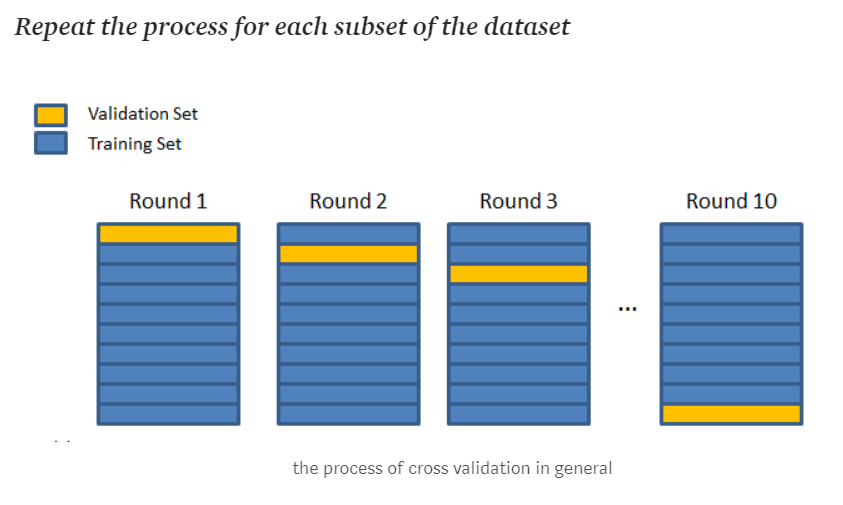

Source image: https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85

L'image ci-dessus est un exemple de validation croisée divisé en k=10 partitions

<div style="text-align:justify">
La validation croisée nous permet de confirmer que le résultat obtenu n'est pas dû au hasard. Il nous permet également de valider la qualité de notre modèle et de nos données. Par exemple, si les résultats obtenus par chacune des k partitions de test sont semblables, on peut dire que notre modèle est bien ajusté à nos données.  
</div> <br/> <div style="text-align:justify">
Dans notre cas, nous n'avions pas utilisé de validation croisée. Nous avions simplement pris le 1/4 de nos données comme notre ensemble de tests et le 3/4 qui restait ont été utilisé pour entraîner notre modèle, ce qui a causé les problèmes mentionnés ci-dessus.
</div>

<a id='6.2.'></a>
## 6.2 Autres approches essayées

<div style="text-align:justify">

Une autre approche considérée était de faire une classification bayésienne naïve sur les modes en les regroupant comme suit:  

1. Voiture: mode 1 
2. Autres modes: mode 2, 3, 4, 5

Voici une image pour représenter l'approche tentée ici: 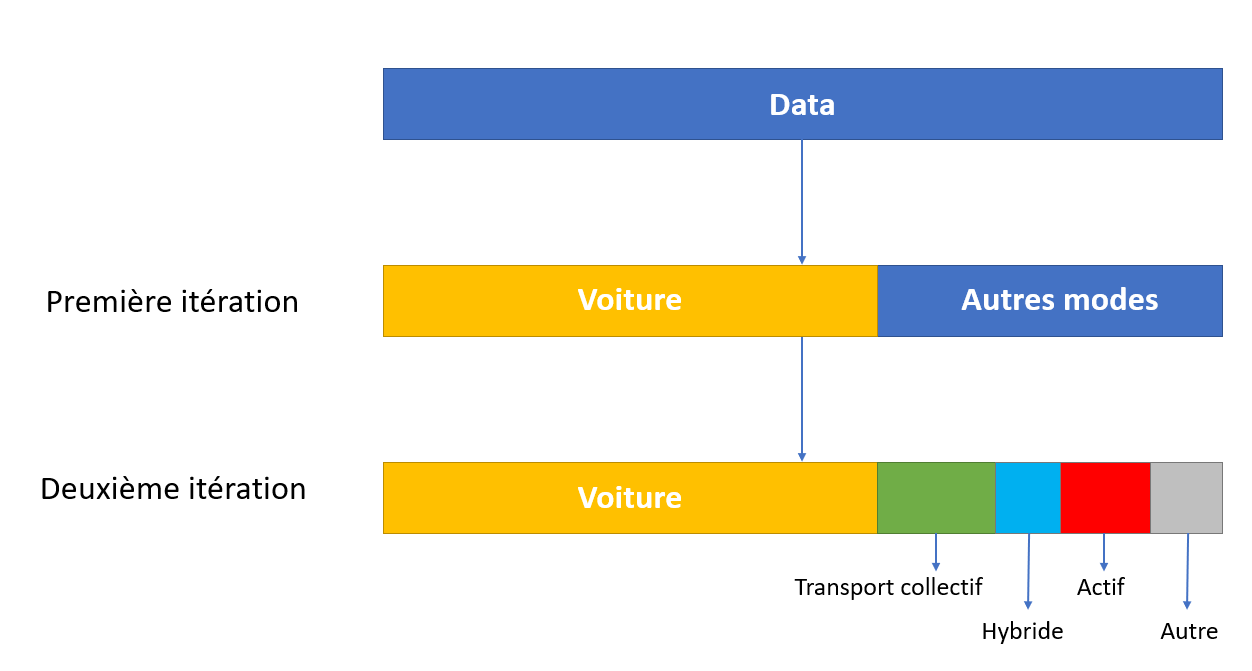

<div style="text-align:justify">
Le but de cette approche est de surmonter la difficulté à catégoriser notre mode de transport en 5 catégories. Catégoriser nos modes en 2 groupes était beaucoup plus facile puisque les impacts de nos variables explicatives sur notre variable d'intérêt sont beaucoup plus évidents. Par la suite, on exécute notre algorithme de classification sur les modes dans le groupe Autres modes.
</div>  <br /> <div style="text-align:justify">
En adoptant cette approche, notre première classification donnait un score d’environ 78% c'est-à-dire que 78% de nos déplacements tests qui utilisaient une voiture étaient bien prédits. Cependant, la deuxième itération de notre classification donnait seulement un score de 49%. Le score pour l'ensemble de nos tests était d'environ 64%, ce qui n'était pas mieux que notre approche initiale de classification bayésienne.
</div> <br /> <div style="text-align:justify">
La raison pour laquelle notre deuxième itération donnait un score si bas est due aux erreurs de la première itération. Pour améliorer ce modèle, il aurait fallu faire 2 phases exploratoires, une pour chaque itération. L’importante partie de cette approche est d'améliorer la première itération, puisque la seconde itération dépend sur elle en grande partie. Par exemple, si on obtient un score de 50% dans la première partie, même si notre algorithme est capable de distinguer à une précision de 100% les autres modes, on obtiendra un score médiocre. Cependant, dû au manque de temps, nous avions décidé d'abandonner cette approche. 
</div>

<a id='7.'></a> 
## 7. Conclusion 
<br> <div style="text-align:justify">
Le projet final a été très formatif dans le contexte de ce cours. Il a été une opportunité pour appliquer les éléments théoriques du cours dans une situation concrète. La problématique du projet est un sujet d'actualité qui nous a plu et intéressés grandement. Il fait plaisir de travailler sur des sujets ayant une pertinence immédiate dans la vie quotidienne et une importance sociétale. Néanmoins, malgré nos efforts, le résultat obtenu en fin de compte n'était pas celui espéré. Nous avons obtenu un score final en dessous de nos attentes. Nous sommes par contre capables de souligner un nombre de facteurs qui peuvent expliquer cette performance défaillante et quelques pistes de solutions pour les futurs travaux. En somme, malgré l'imperfection de notre performance, nous en avons tout de même retenu des leçons considérables et sommes contents de nos apprentissages lors du cours.

</div> <a id='7.1.'></a>

### 7.1 Retours sur le travail en équipe

<div style="text-align:justify"> <br />
En rétrospective, il s'est avéré que travailler directement sur le Jupyter Notebook n'était pas une pratique très productive pour une équipe contenant 5 membres. Il s'avère en fait que le format du fichier ipynb n'est pas très commode pour y faire des 'merge' sur git et la gestion de conflits. Il aurait été beaucoup plus efficace de simplement travailler sur des fichiers Julia (.jl) pour y écrire notre script puis par la suite incorporer le code dans le rapport du notebook.
</div> <a id='7.2.'></a>

### 7.2 Retours sur la méthodologie <br> <div style="text-align:justify">
Tel qu'énoncé plus haut, notre méthodologie à consisté en une analyse exploratoire qui a couvert toutes les variables offertes par notre jeu de données. Nous avons par la suite tout de suite tenté de nous lancer dans la classification bayésienne naïve. En rétrospective, nous avons peut-être été trop rapides à nous lancer dans la classification. Il aurait probablement été pertinent de s'attarder à une analyse plus profonde des variables. Une agrégation plus sophistiquée des différentes informations que nous avons en notre disposition aurait sans doute pu être possible. Il aurait aussi pu être possible d'aller chercher de l'information externe, chose que nous n'avons aucunement tenté de faire.
<br />
Pour ce qui est de la détermination des lois a priori, comme mentionné, nous avons tout d'abord procédé par essai-erreur, mais par la suite, un algorithme se basant sur la minimisation de l'entropie a été implémenté. Cette pratique est en soi critiquable. Nous nous sommes basés sur l'interprétation des notes de cours, mais nous ne demeurons toujours pas convaincus qu'il s'agit d'une solution valable. 
</div> <a id='7.3.'></a>

### 7.3 Retours sur les résultats <br> <div style="text-align:justify">
Notre meilleur résultat a été de 66.093% de prédiction correcte. Ce résultat est dû à notre modèle de classification bayésien naïf et aux différents peaufinages que nous lui avons apportés et qui sont mentionnés dans la section de méthodologie. De plus, nous avons pris soin de mentionner des voies de solutions pour faire augmenter notre score de prédiction. 
</div> <br>

<div style="text-align:justify">    
En conclusion, le projet a été une belle introduction au type de problématique que nous pouvons tenter de résoudre à l'aide des techniques probabilistes. Il s'agit aussi d'un bon premier pas dans notre spécialisation en intelligence artificielle. Somme toute, nous sommes contents de notre travail et sommes certainement intrigués à continuer dans ce cheminement afin de perfectionner nos connaissances.